# Violation case

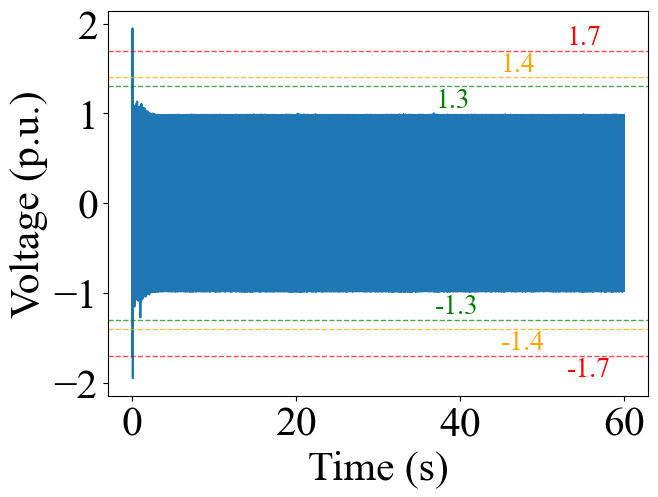

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size']=30
plt.rcParams['font.family']='Times new roman'

x = pd.read_csv("./microgrid_violation.csv", delimiter=",")
time = x.iloc[:600000,0]
data = x.iloc[:600000,1]
plt.xticks([0,20,40,60])

# use below for first 1000ms, and adjust text location followed
# time = x.iloc[:1000,0]
# data = x.iloc[:1000,1]
# plt.xticks([0.00, 0.05, 0.10])

plt.plot(time,data)
plt.axhline(y=-1.7, color='r', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-1.4, color='orange', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-1.3, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1.3, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1.4, color='orange', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1.7, color='r', linestyle='--', linewidth=1, alpha=0.7)
plt.text(53, -1.85, -1.7, verticalalignment='center', fontsize=20, color='r')
plt.text(45, -1.55, -1.4, verticalalignment='center', fontsize=20, color='orange')
plt.text(37, -1.15, -1.3, verticalalignment='center', fontsize=20, color='green')
plt.text(37, 1.15, 1.3, verticalalignment='center', fontsize=20, color='green')
plt.text(45.01, 1.55, 1.4, verticalalignment='center', fontsize=20, color='orange')
plt.text(53, 1.85, 1.7, verticalalignment='center', fontsize=20, color='r')

plt.yticks([-2,-1,0,1,2])


plt.xlabel("Time (s)")
plt.ylabel("Voltage (p.u.)")
plt.tight_layout(pad=0.02)

plt.savefig("mc_violation_60.jpg")
# plt.savefig("mc_violation_60.eps")
plt.show()

In [27]:
import os
import numpy as np
import time
import pandas as pd
from sortedcontainers import SortedList


data_file_path = './microgrid_violation.csv'
data = pd.read_csv(data_file_path, delimiter=",", skiprows=1)
t = np.array(data.iloc[:600000, 0])
d = np.abs(np.array(data.iloc[:600000, 1]))

# use the below to generate first 1000ms rosi
# t = np.array(data.iloc[:1000, 0])
# d = np.abs(np.array(data.iloc[:1000, 1]))


up_1 = np.array([2]*len(d), dtype="float")
up_2 = np.array([2]*len(d), dtype="float")
up_3 = np.array([2]*len(d), dtype="float")
up_4 = np.array([2]*len(d), dtype="float")
down_1 = np.array([-1]*len(d), dtype="float")
down_2 = np.array([-1]*len(d), dtype="float")
down_3 = np.array([-1]*len(d), dtype="float")
down_4 = np.array([-1]*len(d), dtype="float")


avl = SortedList()

for i in range(1,len(d)):
    if(2-d[i]<up_1[i-1]):
        up_1[i] = 2-d[i]
    else:
        up_1[i] = up_1[i-1]
    
for i in range(16):
    avl.add(1.7-d[i])
    
for i in range(16,len(d)):
    avl.add(1.7-d[i])
        
    if(i<600000-16-1):
        up_2[i] = avl[-(i-16+1)]
        
    else:
        down_2[i] = avl[-(600000-16)]
        up_2[i] = avl[-(-16+1+i)]
    
avl = SortedList()
for i in range(30):
    avl.add(1.4-d[i])
    
for i in range(30,len(d)):
    avl.add(1.4-d[i])
        
    if(i<600000-30-1):
        up_3[i] = avl[-(i-30+1)]
        
    else:
        down_3[i] = avl[-(600000-30)]
        up_3[i] = avl[-(-30+1+i)]

avl = SortedList()
for i in range(160):
    avl.add(1.3-d[i])
    
for i in range(160,len(d)):
    avl.add(1.3-d[i])
        
    if(i<600000-160-1):
        up_4[i] = avl[-(i-160+1)]
        
    else:
        down_4[i] = avl[-(600000-160)]
        up_4[i] = avl[-(-160+1+i)]

tmp = np.vstack([up_1, up_2, up_3, up_4])
up_5 = np.min(tmp, axis=0)
tmp = np.vstack([down_1, down_2, down_3, down_4])
down_5 = np.min(tmp, axis=0)

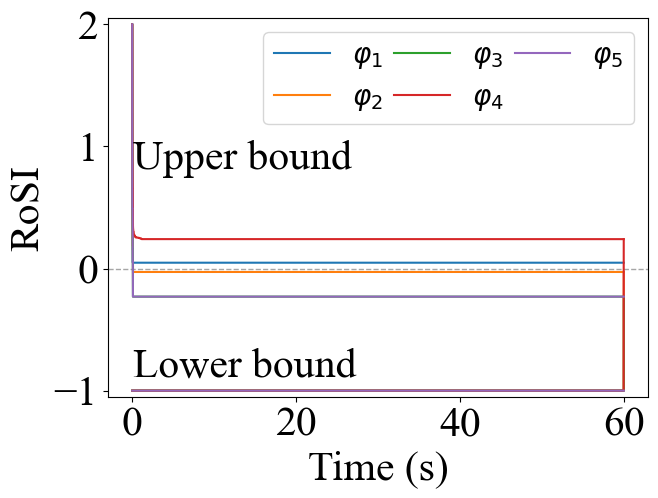

<Figure size 640x480 with 0 Axes>

In [28]:

plt.figure(figsize=(6.4, 4.8))
plt.plot(t, up_1, color='C0', label=r"$\varphi_1$")
plt.plot(t, down_1, color='C0')
plt.plot(t, up_2, color='C1', label=r"$\varphi_2$")
plt.plot(t, down_2, color='C1')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

plt.plot(t, up_3, color='C2', label=r"$\varphi_3$")
plt.plot(t, down_3, color='C2')
plt.plot(t, up_4, color='C3', label=r"$\varphi_4$")
plt.plot(t, down_4, color='C3')
plt.plot(t, up_5, color='C4', label=r"$\varphi_5$")
plt.plot(t, down_5, color='C4')

plt.legend(fontsize=20, ncols=3, columnspacing=0.4)
plt.yticks([-1, 0, 1, 2])
plt.ylim([-1.05,2.05])
plt.xlabel("Time (s)")
plt.ylabel("RoSI")

plt.text(0.05, 0.9, "Upper bound",verticalalignment='center', fontsize=30, color='black')
plt.text(0.05, -0.8, "Lower bound",verticalalignment='center', fontsize=30, color='black')

plt.tight_layout(pad=0.02)
plt.show()
plt.savefig("mc_violation_rosi_60.jpg")
# plt.savefig("mc_violation_rosi.eps")

# Satisfaction case

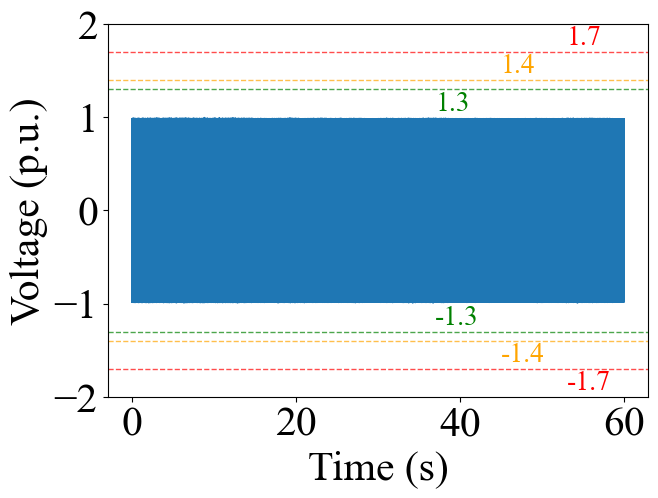

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size']=30
plt.rcParams['font.family']='Times new roman'

x = pd.read_csv("./microgrid_satisfaction.csv", delimiter=",")
time = x.iloc[:600000,0]
data = x.iloc[:600000,1]
plt.xticks([0,20,40,60])

# use below for first 1000ms, and adjust text location followed
# time = x.iloc[:1000,0]
# data = x.iloc[:1000,1]
# plt.xticks([0.00, 0.05, 0.10])

plt.plot(time,data)
plt.axhline(y=-1.7, color='r', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-1.4, color='orange', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-1.3, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1.3, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1.4, color='orange', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1.7, color='r', linestyle='--', linewidth=1, alpha=0.7)
plt.text(53, -1.85, -1.7, verticalalignment='center', fontsize=20, color='r')
plt.text(45, -1.55, -1.4, verticalalignment='center', fontsize=20, color='orange')
plt.text(37, -1.15, -1.3, verticalalignment='center', fontsize=20, color='green')
plt.text(37, 1.15, 1.3, verticalalignment='center', fontsize=20, color='green')
plt.text(45.01, 1.55, 1.4, verticalalignment='center', fontsize=20, color='orange')
plt.text(53, 1.85, 1.7, verticalalignment='center', fontsize=20, color='r')

plt.yticks([-2,-1,0,1,2])

plt.xlabel("Time (s)")
plt.ylabel("Voltage (p.u.)")
plt.tight_layout(pad=0.02)

plt.savefig("mc_satisfaction_60.jpg")
# plt.savefig("mc_violation_60.eps")
plt.show()

In [48]:
import os
import numpy as np
import time
import pandas as pd
from sortedcontainers import SortedList

# e5v, e5s, e5, e55, t55 = [], [], [], [], []
data_file_path = './microgrid_satisfaction.csv'
data = pd.read_csv(data_file_path, delimiter=",", skiprows=1)
t = np.array(data.iloc[:600000, 0])
d = np.abs(np.array(data.iloc[:600000, 1]))

# use the below for the first 1000 ms
# t = np.array(data.iloc[:1000, 0])
# d = np.abs(np.array(data.iloc[:1000, 1]))


up_1 = np.array([2]*len(d), dtype="float")
up_2 = np.array([2]*len(d), dtype="float")
up_3 = np.array([2]*len(d), dtype="float")
up_4 = np.array([2]*len(d), dtype="float")
down_1 = np.array([-1]*len(d), dtype="float")
down_2 = np.array([-1]*len(d), dtype="float")
down_3 = np.array([-1]*len(d), dtype="float")
down_4 = np.array([-1]*len(d), dtype="float")
# break_flag = 0

avl = SortedList()

for i in range(1,len(d)):
    if(2-d[i]<up_1[i-1]):
        up_1[i] = 2-d[i]
    else:
        up_1[i] = up_1[i-1]
down_1[-1] = up_1[-1]

for i in range(16):
    avl.add(1.7-d[i])
    
for i in range(16,len(d)):
    avl.add(1.7-d[i])
        
    if(i<600000-16-1):
        up_2[i] = avl[-(i-16+1)]
        
    else:
        down_2[i] = avl[-(600000-16)]
        # up = avl.get_tau_largest(600000-16-(600000-(i+1)))
        up_2[i] = avl[-(-16+1+i)]
    
avl = SortedList()
for i in range(30):
    avl.add(1.4-d[i])
    
for i in range(30,len(d)):
    avl.add(1.4-d[i])
        
    if(i<600000-30-1):
        up_3[i] = avl[-(i-30+1)]
        
    else:
        down_3[i] = avl[-(600000-30)]
        # up = avl.get_tau_largest(600000-16-(600000-(i+1)))
        up_3[i] = avl[-(-30+1+i)]

avl = SortedList()
for i in range(160):
    avl.add(1.3-d[i])
    
for i in range(160,len(d)):
    avl.add(1.3-d[i])
        
    if(i<600000-160-1):
        up_4[i] = avl[-(i-160+1)]
        
    else:
        down_4[i] = avl[-(600000-160)]
        # up = avl.get_tau_largest(600000-16-(600000-(i+1)))
        up_4[i] = avl[-(-160+1+i)]

tmp = np.vstack([up_1, up_2, up_3, up_4])
up_5 = np.min(tmp, axis=0)
tmp = np.vstack([down_1, down_2, down_3, down_4])
down_5 = np.min(tmp, axis=0)





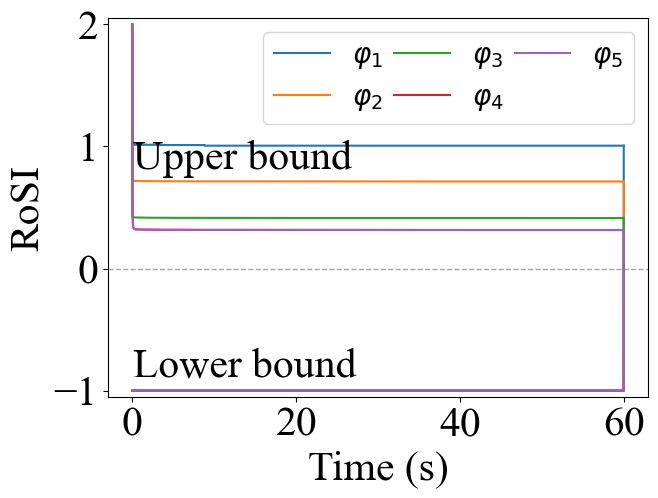

<Figure size 640x480 with 0 Axes>

In [49]:

plt.figure(figsize=(6.4, 4.8))
plt.plot(t, up_1, color='C0', label=r"$\varphi_1$")
plt.plot(t, down_1, color='C0')
plt.plot(t, up_2, color='C1', label=r"$\varphi_2$")
plt.plot(t, down_2, color='C1')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

plt.plot(t, up_3, color='C2', label=r"$\varphi_3$")
plt.plot(t, down_3, color='C2')
plt.plot(t, up_4, color='C3', label=r"$\varphi_4$")
plt.plot(t, down_4, color='C3')
plt.plot(t, up_5, color='C4', label=r"$\varphi_5$")
plt.plot(t, down_5, color='C4')

plt.legend(fontsize=20, ncols=3, columnspacing=0.4)
plt.yticks([-1, 0, 1, 2])
plt.ylim([-1.05,2.05])
plt.xlabel("Time (s)")
plt.ylabel("RoSI")

plt.text(0.05, 0.9, "Upper bound",verticalalignment='center', fontsize=30, color='black')
plt.text(0.05, -0.8, "Lower bound",verticalalignment='center', fontsize=30, color='black')

plt.tight_layout(pad=0.02)
plt.show()
plt.savefig("mc_satisfaction_rosi_60.jpg")
# plt.savefig("mc_violation_rosi_60.eps")

# Overhead test for 100 traces

In [68]:
import os
import numpy as np
import time
import pandas as pd
e1v = []
e1s = []
e1=[]
e11 = []
t11 = []

# e1vc = 0
# e1sc = 0

folder = "./microgrid_trace"


for j in os.listdir(folder):
    

    num = j.split(".")[0].split("-")[1]
    print(f"Processing file {j}, num: {num}")
    data = pd.read_csv(os.path.join(folder, j), delimiter=",", skiprows=1)
    t = np.array(data.iloc[:600000,0])
    d = np.array(data.iloc[:600000,1])
    d = np.abs(d)
    begin = time.perf_counter()


    for i in range(len(d)):
        if(i==len(d)-1):
            break
            
        if(2-d[i]<0):
            e1v.append(int(num))
            e1.append(int(num))
            e11.append(i)
            break
        
        
        
    end = time.perf_counter()
    t11.append(end-begin)

Processing file trace-101.csv, num: 101
Processing file trace-102.csv, num: 102
Processing file trace-103.csv, num: 103
Processing file trace-104.csv, num: 104
Processing file trace-105.csv, num: 105
Processing file trace-106.csv, num: 106
Processing file trace-107.csv, num: 107
Processing file trace-108.csv, num: 108
Processing file trace-109.csv, num: 109
Processing file trace-110.csv, num: 110
Processing file trace-111.csv, num: 111
Processing file trace-112.csv, num: 112
Processing file trace-113.csv, num: 113
Processing file trace-114.csv, num: 114
Processing file trace-115.csv, num: 115
Processing file trace-116.csv, num: 116
Processing file trace-117.csv, num: 117
Processing file trace-118.csv, num: 118
Processing file trace-119.csv, num: 119
Processing file trace-120.csv, num: 120
Processing file trace-121.csv, num: 121
Processing file trace-122.csv, num: 122
Processing file trace-123.csv, num: 123
Processing file trace-124.csv, num: 124
Processing file trace-125.csv, num: 125


In [69]:
import os
import numpy as np
import time
import pandas as pd
from sortedcontainers import SortedList

e2v, e2s, e2, e22, t22 = [], [], [], [], []
folder = "./microgrid_trace"

for j in os.listdir(folder):
    num = int(j.split(".")[0].split("-")[1])
    print(f"Processing file {j}, num: {num}")

    data = pd.read_csv(os.path.join(folder, j), delimiter=",", skiprows=1)
    d = np.abs(np.array(data.iloc[:600000, 1]))  # Take absolute values

    avl = SortedList()
    begin = time.perf_counter()

    # Insert first 16 elements
    for i in range(16):
        avl.add(1.7-d[i])

    # Process remaining elements
    for i in range(16, len(d)):        
        avl.add(1.7-d[i])

        if i < 600000 - 16 - 1:
            up = avl[-(i - 16 + 1)] if len(avl) >= (i - 16 + 1) else 1000
            down = -1000  # Default value
        else:
            down = avl[-(600000 - 16)] if len(avl) >= (600000 - 16) else 1000
            up = avl[-(i - 16 + 1)] if len(avl) >= (i - 16 + 1) else 1000

        if(i==len(d)-1):
            break
            
        if up < 0:
            e2v.append(num)
            e2.append(num)
            e22.append(i)
            break

        if down > 0:
            e2s.append(num)
            e2.append(num)
            e22.append(i)
            break

    end = time.perf_counter()
    t22.append(end - begin)


Processing file trace-101.csv, num: 101
Processing file trace-102.csv, num: 102
Processing file trace-103.csv, num: 103
Processing file trace-104.csv, num: 104
Processing file trace-105.csv, num: 105
Processing file trace-106.csv, num: 106
Processing file trace-107.csv, num: 107
Processing file trace-108.csv, num: 108
Processing file trace-109.csv, num: 109
Processing file trace-110.csv, num: 110
Processing file trace-111.csv, num: 111
Processing file trace-112.csv, num: 112
Processing file trace-113.csv, num: 113
Processing file trace-114.csv, num: 114
Processing file trace-115.csv, num: 115
Processing file trace-116.csv, num: 116
Processing file trace-117.csv, num: 117
Processing file trace-118.csv, num: 118
Processing file trace-119.csv, num: 119
Processing file trace-120.csv, num: 120
Processing file trace-121.csv, num: 121
Processing file trace-122.csv, num: 122
Processing file trace-123.csv, num: 123
Processing file trace-124.csv, num: 124
Processing file trace-125.csv, num: 125


In [70]:
import os
import numpy as np
import time
import pandas as pd
from sortedcontainers import SortedList

e3v, e3s, e3, e33, t33 = [], [], [], [], []
folder = "./microgrid_trace"

for j in os.listdir(folder):
    num = int(j.split(".")[0].split("-")[1])
    print(f"Processing file {j}, num: {num}")

    data = pd.read_csv(os.path.join(folder, j), delimiter=",", skiprows=1)
    d = np.abs(np.array(data.iloc[:600000, 1]))  # Take absolute values

    avl = SortedList()
    begin = time.perf_counter()

    # Insert first 30 elements
    for i in range(30):
        avl.add(1.4-d[i])

    # Process remaining elements
    for i in range(30, len(d)):        
        avl.add(1.4-d[i])

        if i < 600000 - 30 - 1:
            up = avl[-(i - 30 + 1)] if len(avl) >= (i - 30 + 1) else 1000
            down = -1000  # Default value
        else:
            down = avl[-(600000 - 30)] if len(avl) >= (600000 - 30) else 1000
            up = avl[-(i - 30 + 1)] if len(avl) >= (i - 30 + 1) else 1000

        if(i==len(d)-1):
            break
            
        if up < 0:
            e3v.append(num)
            e3.append(num)
            e33.append(i)
            break

        if down > 0:
            e3s.append(num)
            e3.append(num)
            e33.append(i)
            break

    end = time.perf_counter()
    t33.append(end - begin)


Processing file trace-101.csv, num: 101
Processing file trace-102.csv, num: 102
Processing file trace-103.csv, num: 103
Processing file trace-104.csv, num: 104
Processing file trace-105.csv, num: 105
Processing file trace-106.csv, num: 106
Processing file trace-107.csv, num: 107
Processing file trace-108.csv, num: 108
Processing file trace-109.csv, num: 109
Processing file trace-110.csv, num: 110
Processing file trace-111.csv, num: 111
Processing file trace-112.csv, num: 112
Processing file trace-113.csv, num: 113
Processing file trace-114.csv, num: 114
Processing file trace-115.csv, num: 115
Processing file trace-116.csv, num: 116
Processing file trace-117.csv, num: 117
Processing file trace-118.csv, num: 118
Processing file trace-119.csv, num: 119
Processing file trace-120.csv, num: 120
Processing file trace-121.csv, num: 121
Processing file trace-122.csv, num: 122
Processing file trace-123.csv, num: 123
Processing file trace-124.csv, num: 124
Processing file trace-125.csv, num: 125


In [71]:
import os
import numpy as np
import time
import pandas as pd
from sortedcontainers import SortedList

e4v, e4s, e4, e44, t44 = [], [], [], [], []
folder = "./microgrid_trace"

for j in os.listdir(folder):
    num = int(j.split(".")[0].split("-")[1])
    print(f"Processing file {j}, num: {num}")

    data = pd.read_csv(os.path.join(folder, j), delimiter=",", skiprows=1)
    d = np.abs(np.array(data.iloc[:600000, 1]))  # Take absolute values

    avl = SortedList()
    begin = time.perf_counter()

    # Insert first 160 elements
    for i in range(160):
        avl.add(1.3-d[i])

    # Process remaining elements
    for i in range(160, len(d)):        
        avl.add(1.3-d[i])

        if i < 600000 - 160 - 1:
            up = avl[-(i - 160 + 1)] if len(avl) >= (i - 160 + 1) else 1000
            down = -1000  # Default value
        else:
            down = avl[-(600000 - 160)] if len(avl) >= (600000 - 160) else 1000
            up = avl[-(i - 160 + 1)] if len(avl) >= (i - 160 + 1) else 1000

        if(i==len(d)-1):
            break
            
        if up < 0:
            e4v.append(num)
            e4.append(num)
            e44.append(i)
            break

        if down > 0:
            e4s.append(num)
            e4.append(num)
            e44.append(i)
            break

    end = time.perf_counter()
    t44.append(end - begin)


Processing file trace-101.csv, num: 101
Processing file trace-102.csv, num: 102
Processing file trace-103.csv, num: 103
Processing file trace-104.csv, num: 104
Processing file trace-105.csv, num: 105
Processing file trace-106.csv, num: 106
Processing file trace-107.csv, num: 107
Processing file trace-108.csv, num: 108
Processing file trace-109.csv, num: 109
Processing file trace-110.csv, num: 110
Processing file trace-111.csv, num: 111
Processing file trace-112.csv, num: 112
Processing file trace-113.csv, num: 113
Processing file trace-114.csv, num: 114
Processing file trace-115.csv, num: 115
Processing file trace-116.csv, num: 116
Processing file trace-117.csv, num: 117
Processing file trace-118.csv, num: 118
Processing file trace-119.csv, num: 119
Processing file trace-120.csv, num: 120
Processing file trace-121.csv, num: 121
Processing file trace-122.csv, num: 122
Processing file trace-123.csv, num: 123
Processing file trace-124.csv, num: 124
Processing file trace-125.csv, num: 125


In [74]:
import os
import numpy as np
import time
import pandas as pd
from sortedcontainers import SortedList

e5v, e5s, e5, e55, t55 = [], [], [], [], []
folder = "./microgrid_trace"

for j in os.listdir(folder):
    up_1 = up_2 = up_3 = up_4 = 1000
    break_flag = 0
    
    avl = SortedList()
    num = int(j.split(".")[0].split("-")[1])
    print(f"Processing file {j}, num: {num}")
    
    data = pd.read_csv(os.path.join(folder, j), delimiter=",", skiprows=1)

    t = np.array(data.iloc[:600000, 0])
    d = np.abs(np.array(data.iloc[:600000, 1]))
    
    begin = time.perf_counter()

    for i in range(16):
        avl.add(-d[i])
        if d[i] > 2:
            up_1 = 2 - d[i]
        if min(up_1, up_2, up_3, up_4) < 0:
            e5v.append(num)
            e5.append(num)
            e55.append(i)
            break_flag = 1
            break

    if not break_flag:
        for i in range(16, 30):
            avl.add(-d[i])
            up_2 = avl[-(i - 16 + 1)] + 1.7 if len(avl) >= (i - 16 + 1) else 1000
            if d[i] > 2:
                up_1 = 2 - d[i]
            if min(up_1, up_2, up_3, up_4) < 0:
                e5v.append(num)
                e5.append(num)
                e55.append(i)
                break_flag = 1
                break

    if not break_flag:
        for i in range(30, 160):
            avl.add(-d[i])
            up_2 = avl[-(i - 16 + 1)] + 1.7 if len(avl) >= (i - 16 + 1) else 1000
            up_3 = avl[-(i - 30 + 1)] + 1.4 if len(avl) >= (i - 30 + 1) else 1000
            if d[i] > 2:
                up_1 = 2 - d[i]
            if min(up_1, up_2, up_3, up_4) < 0:
                e5v.append(num)
                e5.append(num)
                e55.append(i)
                break_flag = 1
                break

    if not break_flag:
        for i in range(160, len(d)):
            avl.add(-d[i])

            if d[i] > 2:
                up_1 = 2 - d[i]

            if i < 600000 - 160 - 1:
                up_2 = avl[-(i - 16 + 1)] + 1.7 if len(avl) >= (i - 16 + 1) else 1000
                up_3 = avl[-(i - 30 + 1)] + 1.4 if len(avl) >= (i - 30 + 1) else 1000
                up_4 = avl[-(i - 160 + 1)] + 1.3 if len(avl) >= (i - 160 + 1) else 1000
            else:
                up_4 = avl[-(600000 - 160 + i)] + 1.3 if len(avl) >= (600000 - 160 + i) else 1000
                up_3 = avl[-(600000 - 30 + i)] + 1.4 if len(avl) >= (600000 - 30 + i) else 1000
                up_2 = avl[-(600000 - 16 + i)] + 1.7 if len(avl) >= (600000 - 16 + i) else 1000

            if(i==len(d)-1):
                break
                
            if min(up_1, up_2, up_3, up_4) < 0:
                e5v.append(num)
                e5.append(num)
                e55.append(i)
                break_flag = 1
                break

    end = time.perf_counter()
    t55.append(end - begin)


Processing file trace-101.csv, num: 101
Processing file trace-102.csv, num: 102
Processing file trace-103.csv, num: 103
Processing file trace-104.csv, num: 104
Processing file trace-105.csv, num: 105
Processing file trace-106.csv, num: 106
Processing file trace-107.csv, num: 107
Processing file trace-108.csv, num: 108
Processing file trace-109.csv, num: 109
Processing file trace-110.csv, num: 110
Processing file trace-111.csv, num: 111
Processing file trace-112.csv, num: 112
Processing file trace-113.csv, num: 113
Processing file trace-114.csv, num: 114
Processing file trace-115.csv, num: 115
Processing file trace-116.csv, num: 116
Processing file trace-117.csv, num: 117
Processing file trace-118.csv, num: 118
Processing file trace-119.csv, num: 119
Processing file trace-120.csv, num: 120
Processing file trace-121.csv, num: 121
Processing file trace-122.csv, num: 122
Processing file trace-123.csv, num: 123
Processing file trace-124.csv, num: 124
Processing file trace-125.csv, num: 125


In [78]:
print("Algorithm overheads")
print(sum(t11))
print(sum(t22))
print(sum(t33))
print(sum(t44))
print(sum(t55))

Algorithm overheads
11.459248200524598
121.98164479900151
124.0060386005789
189.49363290006295
198.7827707005199
